# Sequential API

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

* Lets create a simple NN for a simple Classification :

In [4]:
from tensorflow import keras


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.layers

In [7]:
hidden_1 = model.layers[1]

In [8]:
hidden_1.name

'dense'

In [9]:
weights, biases = hidden_1.get_weights()

In [10]:
weights

array([[ 0.03332268, -0.06717332, -0.01849941, ..., -0.02720114,
        -0.00273731,  0.02245871],
       [ 0.07281177, -0.00808894, -0.04431435, ..., -0.01142962,
         0.02570157, -0.01082066],
       [-0.00508663, -0.02084395, -0.01595578, ...,  0.01698745,
         0.04584389, -0.00531974],
       ...,
       [-0.04133922, -0.05522975, -0.06046027, ...,  0.03584951,
         0.0401158 ,  0.04860025],
       [ 0.01355819,  0.07367799, -0.0178405 , ..., -0.05248886,
         0.0585022 , -0.04992235],
       [ 0.03556841, -0.07115582,  0.04966647, ...,  0.03436694,
        -0.06291672,  0.04337711]], dtype=float32)

In [11]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

The randomness of the weights is normal (which is to break the similarity problem)

and the biases being all 0 is completly fine as well

* now lets compile the model

In [12]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

In [13]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7119 - accuracy: 0.7640 - val_loss: 0.4909 - val_accuracy: 0.8346
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4846 - accuracy: 0.8309 - val_loss: 0.4294 - val_accuracy: 0.8546
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4406 - accuracy: 0.8450 - val_loss: 0.4135 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4146 - accuracy: 0.8543 - val_loss: 0.3973 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3947 - accuracy: 0.8603 - val_loss: 0.4002 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3784 - accuracy: 0.8668 - val_loss: 0.3709 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3658 - accuracy: 0.8702 - val_loss: 0.3582 - val_accuracy:

Let's now see the learning curve :

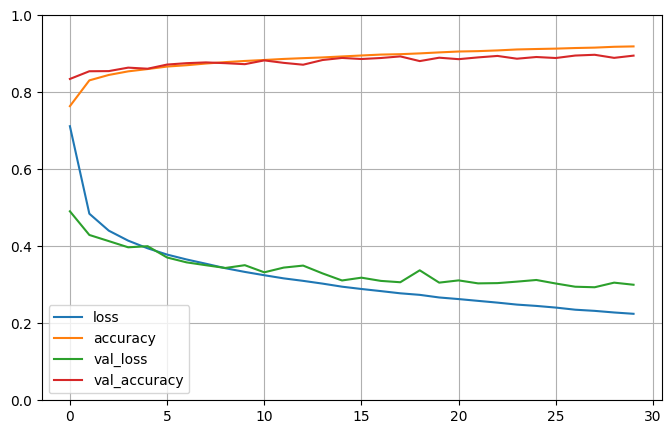

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

well good enough

If the model were to give bad results, our first apprroch would be to change the learning rate

if it was not yet good, we would go to the network itself and change its hyper parametrs

* Now lets evaluate

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 73.3491 - accuracy: 0.8379


[73.3490982055664, 0.8378999829292297]

This is not really a sign of overfitting

Soooooooo, good enough

* Lets use it for the actual prediction's :

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 99ms/step


In [17]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

* Now lets do the same but for a regression task :

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

In [42]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full
)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

This proccess is very simple and similar to the classification problem

In [44]:
import tensorflow
from tensorflow import keras

model_1 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model_1.compile(
    loss="mean_squared_error",
    optimizer="sgd",
    metrics = ["accuracy"]
)

In [45]:
history = model_1.fit(
    X_train, y_train,
    epochs = 20,
    validation_data = (X_val, y_val)
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8184 - accuracy: 0.0028 - val_loss: 0.6082 - val_accuracy: 0.0028
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.0028 - val_loss: 0.4885 - val_accuracy: 0.0028
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4692 - accuracy: 0.0028 - val_loss: 0.4598 - val_accuracy: 0.0028
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4527 - accuracy: 0.0028 - val_loss: 0.4474 - val_accuracy: 0.0028
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.0028 - val_loss: 0.4386 - val_accuracy: 0.0028
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.0028 - val_loss: 0.4344 - val_accuracy: 0.0028
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.0028 - val_loss: 0.4233 - val_accuracy: 0.0028
Epoch 

In [46]:
model_1.evaluate(X_test, y_test)

162/162 [==============================] - 0s 678us/step - loss: 0.4014 - accuracy: 0.0035


[0.4014338552951813, 0.003488372080028057]

Not so great so we will need a more suffisticated model

We will use a non-sequentioal model for this part (more especificly a wide-deep nuerral network)

# Functional API

In [47]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden_1 = keras.layers.Dense(30, activation="relu")(input_)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.Concatenate()([input_, hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs= [input_], outputs= [output])

The compilation's are the same as before

But what if we need the input itself to 2 portions ?

In [48]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden_1 = keras.layers.Dense(30, activation="relu")(input_A)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.Concatenate()([input_B, hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [49]:
from tensorflow.keras.optimizers import SGD

model.compile(
    loss="mse",
    optimizer=SGD(learning_rate=1e-3),
    metrics = ["accuracy"]
)


In [50]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_train[:3], X_train[:3]

In [51]:
history = model.fit(
    (X_train_A, X_train_B),
    y_train,
    epochs=20,
    validation_data=((X_val_A, X_val_B), y_val)
    )

Epoch 1/20


363/363 [==============================] - 1s 2ms/step - loss: 2.1017 - accuracy: 0.0020 - val_loss: 0.8984 - val_accuracy: 0.0028
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8264 - accuracy: 0.0028 - val_loss: 0.7706 - val_accuracy: 0.0028
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7375 - accuracy: 0.0028 - val_loss: 0.7122 - val_accuracy: 0.0028
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.0028 - val_loss: 0.6734 - val_accuracy: 0.0028
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.0028 - val_loss: 0.6372 - val_accuracy: 0.0028
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.0028 - val_loss: 0.6098 - val_accuracy: 0.0028
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.0028 - val_loss: 0.5888 - val_accuracy: 0.0028
Epoch 8/20
363/36

In [52]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

  1/162 [..............................] - ETA: 3s - loss: 0.4268 - accuracy: 0.0000e+00

162/162 [==============================] - 0s 746us/step - loss: 0.5231 - accuracy: 0.0035


In [53]:
mse_test

[0.523102343082428, 0.003488372080028057]

We could also benefit from an auxilary output

one output for each task within a singular network (face detection / whether we glasses are on)

In [54]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden_1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.Concatenate()([input_A, hidden_2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden_2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Take into account we need 2 loss functions

and weight to each output

In [55]:
model.compile(
    loss=["mse", "mse"],
    loss_weights=[0.9, 0.1],
    optimizer="sgd",
    metrics = ["accuracy"]
)

In [56]:
history = model.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    validation_data=([X_val_A, X_val_B], [y_val, y_val])
)


Epoch 1/20


363/363 [==============================] - 1s 2ms/step - loss: 1.1819 - main_output_loss: 1.0705 - aux_output_loss: 2.1849 - main_output_accuracy: 0.0025 - aux_output_accuracy: 0.0023 - val_loss: 0.6019 - val_main_output_loss: 0.5279 - val_aux_output_loss: 1.2670 - val_main_output_accuracy: 0.0028 - val_aux_output_accuracy: 0.0028
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6285 - main_output_loss: 0.5689 - aux_output_loss: 1.1656 - main_output_accuracy: 0.0028 - aux_output_accuracy: 0.0028 - val_loss: 0.5405 - val_main_output_loss: 0.4820 - val_aux_output_loss: 1.0677 - val_main_output_accuracy: 0.0028 - val_aux_output_accuracy: 0.0028
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5269 - main_output_loss: 0.4745 - aux_output_loss: 0.9984 - main_output_accuracy: 0.0026 - aux_output_accuracy: 0.0028 - val_loss: 0.5096 - val_main_output_loss: 0.4623 - val_aux_output_loss: 0.9347 - val_main_output_accuracy: 0.0028 - val_aux_out

In [57]:
eval_results = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

total_loss = eval_results[0]
main_loss = eval_results[1]
aux_loss = eval_results[2]

print("Total loss:", total_loss)
print("Main loss:", main_loss)
print("Auxiliary loss:", aux_loss)

162/162 [==============================] - 0s 1ms/step - loss: 0.3794 - main_output_loss: 0.3673 - aux_output_loss: 0.4880 - main_output_accuracy: 0.0035 - aux_output_accuracy: 0.0035 
Total loss: 0.3793841600418091
Main loss: 0.3673209249973297
Auxiliary loss: 0.4879536032676697


The fact that this is not acceptable does not change the fact that the functional API is a powerfull model

# Dynamic API

In [58]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden_1 = keras.layers.Dense(units, activation=activation)
    self.hidden_2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden_1 = self.hidden_1(input_B)
    hidden_2 = self.hidden_2(hidden_1)
    concat = keras.layers.Concatenate([input_A, input_B])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden_2)
    return main_output, aux_output

In [59]:
model = WideAndDeepModel()

and so on

* save and load

In [60]:
model_1.save("my_keras_model.h5")

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


notice that this can only be done with either the sequential or functional API models


NOT FOR AND OTHER

and to load :

In [61]:
model = keras.models.load_model(r"D:\Sharif University of Tech\Data\Hands-on DL\Season 1\Model\my_keras_model.h5")

But what if we need to save data models half way through ?

While we are at it, why not every where we want ?

In [62]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(r"D:\Sharif University of Tech\Data\Hands-on DL\Season 1\Model\my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 825us/step - loss: 0.3821 - accuracy: 0.0028
Epoch 2/10
154/363 [===========>..................] - ETA: 0s - loss: 0.3706 - accuracy: 0.0026

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.0028
Epoch 3/10
363/363 [==============================] - 0s 866us/step - loss: 0.3773 - accuracy: 0.0028
Epoch 4/10
363/363 [==============================] - 0s 969us/step - loss: 0.3742 - accuracy: 0.0028
Epoch 5/10
363/363 [==============================] - 0s 831us/step - loss: 0.3742 - accuracy: 0.0028
Epoch 6/10
363/363 [==============================] - 0s 835us/step - loss: 0.3765 - accuracy: 0.0028
Epoch 7/10
363/363 [==============================] - 0s 838us/step - loss: 0.3740 - accuracy: 0.0028
Epoch 8/10
363/363 [==============================] - 0s 919us/step - loss: 0.3803 - accuracy: 0.0028
Epoch 9/10
363/363 [==============================] - 0s 828us/step - loss: 0.3739 - accuracy: 0.0028
Epoch 10/10
363/363 [==============================] - 0s 842us/step - loss: 0.3704 - accuracy: 0.0028


and we can also implement an early stopping system aswell 

In [64]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    r"D:\Sharif University of Tech\Data\Hands-on DL\Season 1\Model\my_keras_model.h5", 
    save_best_only=True
)

history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_val, y_val), 
    callbacks=[checkpoint_cb]
)

# and now to roll back to the best model

model = keras.models.load_model(r"D:\Sharif University of Tech\Data\Hands-on DL\Season 1\Model\my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.0028 - val_loss: 0.3558 - val_accuracy: 0.0028
Epoch 2/10
200/363 [===============>..............] - ETA: 0s - loss: 0.3497 - accuracy: 0.0025

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.0028 - val_loss: 0.3571 - val_accuracy: 0.0028
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.0028 - val_loss: 0.3568 - val_accuracy: 0.0028
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.0028 - val_loss: 0.3561 - val_accuracy: 0.0028
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.0028 - val_loss: 0.3633 - val_accuracy: 0.0028
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.0028 - val_loss: 0.3542 - val_accuracy: 0.0028
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.0028 - val_loss: 0.3560 - val_accuracy: 0.0028
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.0028 - val_loss: 0.3518 - val_accuracy: 0.0028
Epoch 9/10
363/36

We can create custom checkbacks aswell :

In [65]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

now lets start visualizing the models we create with a powerful tool :

# TensorBoard

In [79]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [80]:
run_logdir = get_run_logdir()

In [81]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [83]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full
)

In [84]:
import tensorflow
from tensorflow import keras

model_1 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model_1.compile(
    loss="mean_squared_error",
    optimizer="sgd",
    metrics = ["accuracy"]
)

In [86]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [87]:
history = model_1.fit(
    X_train, y_train,
    epochs = 20,
    validation_data = (X_val, y_val), 
    callbacks=[tensorboard_cb]
)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3273 - accuracy: 0.0028 - val_loss: 1.3299 - val_accuracy: 0.0034
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3273 - accuracy: 0.0028 - val_loss: 1.3295 - val_accuracy: 0.0034
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3274 - accuracy: 0.0028 - val_loss: 1.3307 - val_accuracy: 0.0034
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3275 - accuracy: 0.0028 - val_loss: 1.3292 - val_accuracy: 0.0034
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3276 - accuracy: 0.0028 - val_loss: 1.3291 - val_accuracy: 0.0034
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3273 - accuracy: 0.0028 - val_loss: 1.3291 - val_accuracy: 0.0034
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3273 - accuracy: 0.0028 - val_loss: 1.3290 - val_accuracy: 0.0034
Epoch 

and we can use low-level api to make a summary :

In [93]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

with writer.as_default():
    for step in range(1, 1001):
        tf.summary.scalar("my_scaler", np.sin(step / 10), step=step)


        # for demonstration sake we will create random data here :
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)


        # and random images :
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step=step)


        texts = ["The step is ", str(step), "Its square is  ", str(step * step)]
        tf.summary.text("my_text", texts, step=step)

        
        sine_wave = tf.math.sin(tf.range(12000) / 4800 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=4800, step=step)

Now let's tune some hyperparameters :

there are 2 main methods 

one would be to use the follow the logic of the stochastic gradient descent, where we search portion's randomly (simply because it's not worth searchig every possibility)
this algorithm (along with a k-fold method is available in a single library RandomizedSearchCV and GridSearchCV)


another would be to use a simple grid search model to narrow down the search space and zoom in while being more and more percise each time 
this algorithm is the main one and is implemented in many libraries such as :
* Hyperopt
* Talos, kopt, Hyperas
* Keras Tuner
* Scikit-Optimizer
* Spearmint
* Hyperbrand
* Sklearn-Deep

Here is an implementation of the first method :

In [94]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(
        loss="mse", 
        optimizer=optimizer
    )

    return model

In [100]:
from keras.wrappers.scikit_learn import KerasRegressor


keras_reg = KerasRegressor(build_model)

In [104]:
keras_reg.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_data=(X_val, y_val), 
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

In [105]:
mse_test = keras_reg.score(X_test, y_test)

In [106]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV


param_distribs = {
    "n_hidden": [0, 1, 2, 3], 
    "n_neurons": np.arange(1, 100), 
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(
    keras_reg, 
    param_distribs, 
    n_iter=10, 
    cv=3
)

In [107]:
rnd_search_cv.fit(
    X_train, 
    y_train, 
    epochs=100,
    validation_data=(X_val, y_val), 
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)